# Analysis 4

* analyse the variable
* from previous analyses we can find out that the happiness scores difference between Western Europe and  Central and Eastern Europe is large. In this analysis, let's find out each how variables influence the outcomes.

In [3]:
import pandas as pd
# from pythainlp.segment import segment
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [4]:
# define the function to calculate and create the total score of happiness.
def getTotalScore(str):
    # load the data
    data = pd.read_csv(str)
    # get all the columns that to be added together
    colums = data.ix[:,2:]
    # add the new column named 'total score'
    # data['total score'] = colums.sum(axis = 1).head()
    data['total score'] = np.sum(colums,axis = 1)
    # return the data frame
    return data

In [5]:
data2015=getTotalScore('data/2015.csv')
data2016=getTotalScore('data/2016.csv')

In [6]:
#define the function to sort based on total score and add a new column named rank
def getRank(data):
    newData = data.sort_values(by='total score',ascending=False)
    newData['Rank'] = range(1,len(data) + 1)
    newData.index = range(0,len(data))
    return newData

In [7]:
data1 = getRank(data2015)
data2 = getRank(data2016)

In [9]:
data1.columns

Index(['Country', 'Region', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'total score', 'Rank'],
      dtype='object')

In [ ]:
# apply the PCA 

In [13]:
from sklearn.preprocessing import StandardScaler

In [12]:
df = data2015.ix[:,2:-1]

In [33]:
df.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [17]:
# standardize the data prior to a PCA,to make sure it was measured on the same scales. 
X_std = StandardScaler().fit_transform(df)

In [29]:
pd.DataFrame(X_std).head()

,0,1,2,3,4,5,6
0,-1.309758,-2.534738,-1.327310,-1.294643,-0.386381,1.012045,-0.266180
1,0.080959,-0.687668,0.742975,-0.474552,-0.662678,-0.748915,-0.362520
2,0.231814,0.319235,-0.051156,-0.950802,0.254135,-1.259671,0.603690
3,-0.219880,-0.481190,-1.881606,-2.162065,-0.603424,-0.901587,-0.271091
4,0.516054,0.947251,0.637329,0.140632,-0.489595,-0.972301,1.335682


In [30]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [25]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

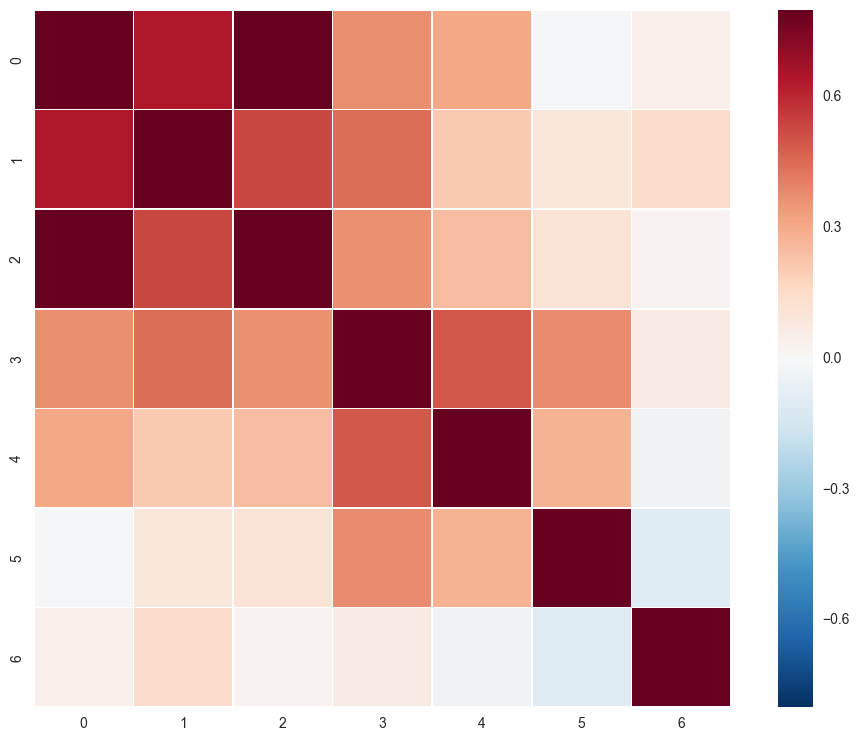

In [34]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cov_mat, vmax=.8, square=True,linewidths=.5);
plt.savefig('4-2.png')

In [100]:
# eig_pairs1

[(2.8998868143778158,
  array([ 0.49931645,  0.45265178,  0.47867305,  0.41885976,  0.32896949,
          0.17466946,  0.04987698])),
 (1.3678196069281936,
  array([ 0.31135195,  0.23107241,  0.2428812 , -0.33910987, -0.41844308,
         -0.63957515,  0.30253552])),
 (1.0074757567646027,
  array([-0.20867813,  0.07426284, -0.23852648,  0.23128222,  0.08272121,
          0.08781997,  0.90884376])),
 (0.15068643206936874,
  array([-0.75559967,  0.21424596,  0.5929985 , -0.04127411,  0.11333   ,
         -0.12827433, -0.02278232])),
 (0.70733802707912563,
  array([-0.04193984,  0.23561227,  0.13335323, -0.0532868 , -0.72472621,
          0.6294931 ,  0.02481347])),
 (0.52366365719237884,
  array([-0.19354103,  0.55125738, -0.45084797,  0.48171367, -0.2118631 ,
         -0.31579256, -0.28059635])),
 (0.38771569284966267,
  array([ 0.00696697, -0.57523714,  0.28686538,  0.64767155, -0.3562077 ,
         -0.20070142,  0.01088658]))]

In [40]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

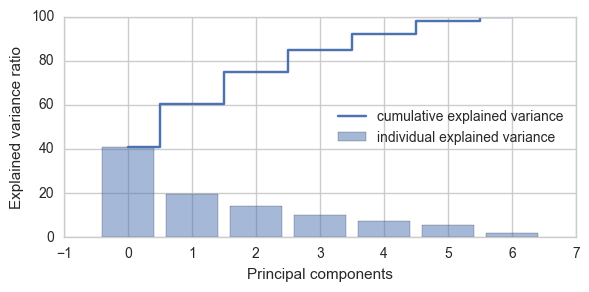

In [46]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 3))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(7), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
#     plt.show()
    plt.savefig('4-3.png')

In [48]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

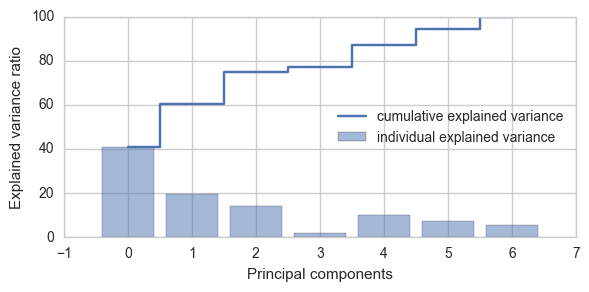

In [49]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 3))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(7), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
#     plt.show()
    plt.savefig('4-4.png')

In [50]:
from sklearn.decomposition import PCA

In [51]:
X = np.array(X_std)

In [52]:
pca=PCA(n_components=6)

In [53]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
Y = pd.DataFrame(pca.transform(X))

In [59]:
Y.columns = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity','Dystopia Residual']

In [60]:
Y.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Trust (Government Corruption),Generosity,Dystopia Residual
0,2.942569,1.442986,0.082748,-0.260193,1.332080,0.161303
1,0.480874,-0.854291,0.804998,0.041225,0.479697,0.684329
2,0.268802,-1.337895,-0.226689,0.852816,0.129276,-0.643638
3,2.503386,-0.843638,0.416558,0.376814,-0.072743,-1.271866
4,-0.786153,-1.717482,-0.931201,-0.054945,-0.238692,0.116693


In [89]:
pca.explained_variance_ratio_

array([ 0.41164759,  0.19416607,  0.14301419,  0.10040874,  0.07433562,
        0.0550374 ])